## Menentukan Pertanyaan Bisnis

# Proyek Analisis Data: bike_sharing_dataset
- Nama: Muhammad Dhiauddin 
- Email: muhammaddhiauddin40@gmail.com
- Id Dicoding: mudhya19

- specifict
1. Berapakah total untuk sewa sepeda untuk tahun dari 2011 dan 2012 seluruh musim gugur dari musim 3 ?

- Measurable
2. Berapa banyak sepeda yang disewakan dalam waktu hari libur, (liburan = 1)  selama musim panas pada tahun 2012 ? 

- Action-Oriented
3.  Bagaimana cara meningkatkan jumlah rental sewa sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1) ?

- Relevant 
4. Apa hubungan suhu (temp) dengan jumlah pengguna yang terdaftar (registered)?
5. Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur ?

- time-Bound
6. Berapa distribusi per jam sewa sepeda (cnt) pada Hari libur dan hari kerja pada tahun 2012 (tahun = 1)?

# menyiapkan semua library yang dibutukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_day = pd.read_csv("..\proyek_tugas_akhir\dataset\day.csv")
df_hour = pd.read_csv("..\proyek_tugas_akhir\dataset\hour.csv")

# Data Wrangling

### gathering data

In [3]:
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
df_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assesing Data

- data type day

In [5]:
print('Dataframe day:')
print(df_day.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


- mising value

In [6]:
print('Dataframe day:')
print(df_day.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- data type hour

In [7]:
print('\nDataframe hour:')
print(df_hour.info())


Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


- mising value

In [8]:
print('Dataframe hour:')
print(df_hour.isna().sum())

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Ducplicate data

In [9]:
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


(✓) Tidak ada data yang duplicate, dengan melalui proses penilaian keseluruhan data

- Descriptive Statictics

In [10]:
df_day.describe().transpose().T.style.background_gradient(cmap="RdPu")

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df_hour.describe().transpose().T.style.background_gradient(cmap="RdPu")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.000000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.029500,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


(✓) descriptive analysis

1. Dataset Day
- Jumlah Data entri ada 731 entri
- Q1 dan Q3 adalah 183.5 dan 548.5
- standard deviation 211.1
- musim yang rata-rata adalah musim panas ke 2 
- hari libur yang hanya ada 2.87% dari total hari
- hari kerja yang hanya ada 68.39% dari total hari
- cuaca dengan keadaan baik ada 1 weathersit 
- Suhu Rata-rata: 0.50 (41°C)
- Suhu Perasaan Rata-rata: 0.47 (50°C)
- Kelembaban rata-rata sekitar 0.47 (47%).
- kecepatan angin rata-rata 0.19 dan maksimal 50%
- jumlah pengguna casual ada berjumlah 848 orang rata-rata
- jumlah pengguna registered ada berjumlah 3656 orang rata-rata
- jumlah rental yang disewakan ada berjumlah 4504 

2. Dataset Hour
- jumlah data entri ada 173 entri
- Q1 dan Q3 adalah 4345.5 dan 13034.5
- standard deviation 5017.0
- musim yang rata-rata adalah musim 2.50, menunjukan rata-rata musim 
- tahun (yr) 0.50, mengindikasikan perbandingan dari tahun 2011 dan 2012
- bulan (mnth) 6.54, menunjukan rata-rata bulan dalam setahun 
- jam (hr) 11.55 mengindikasikan perbandingan dari jam rata-rata sehari 
- hari libur (holiday) 0.03, menunjukan presentasi hari libur 
- Hari dalam seminggu (weekday) 3.00, hari rata-rata dalam seminggu.
- Hari kerja (workingday) 0.68, persentase hari kerja.
- Kondisi cuaca (weathersit) 1.43, kondisi cuaca rata-rata.
- Suhu (temp) 0.50, suhu rata-rata yang normal.
- Suhu perasaan (atemp) 0.48, suhu perasaan mendekati suhu sebenarnya.
- Kelembaban (hum) 0.48, kelembaban rata-rata.
- Kecepatan angin (windspeed) 0.63, kecepatan angin rata-rata.
- Pengguna casual (casual) 35.68, rata-rata jumlah pengguna casual.
- Pengguna terdaftar (registered) 153.79, rata-rata jumlah pengguna terdaftar.
- Total rental sepeda (cnt) 189.46, rata-rata jumlah total rental sepeda.

## Cleaning Data

- Fixed Type

In [12]:
# df_day
df_day = df_day.assign(dteday=pd.to_datetime(df_day["dteday"]))

# df_hour
df_hour = df_hour.assign(dteday=pd.to_datetime(df_hour["dteday"]))

In [13]:
# Check data type for df_day and df_hour
print("df_day['dteday']:", df_day["dteday"].dtypes, "\n" "df_hour['dteday']:", df_hour["dteday"].dtypes)

df_day['dteday']: datetime64[ns] 
df_hour['dteday']: datetime64[ns]


## Exploratory Data Analysis (EDA)

- Korelasi antara variabel numerik 

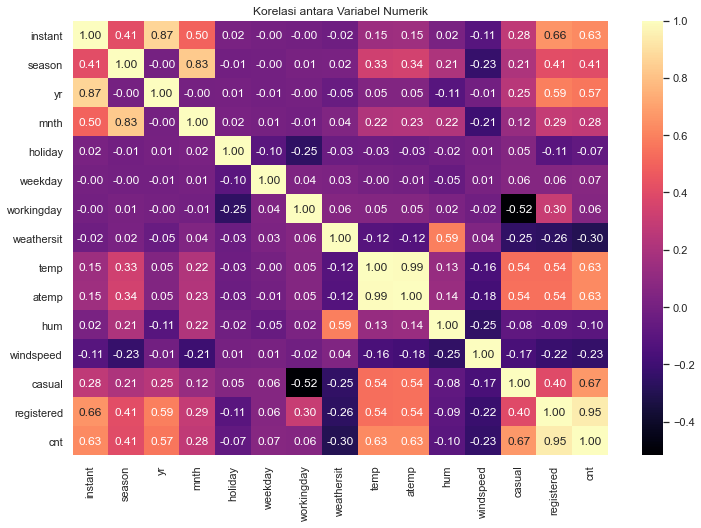

In [14]:
# Matplotlib heatmap
plt.figure(figsize=(12, 8))
sns.set(style="white")  # Set background style to white for better visibility
sns.heatmap(df_day.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Korelasi antara Variabel Numerik")
plt.show()

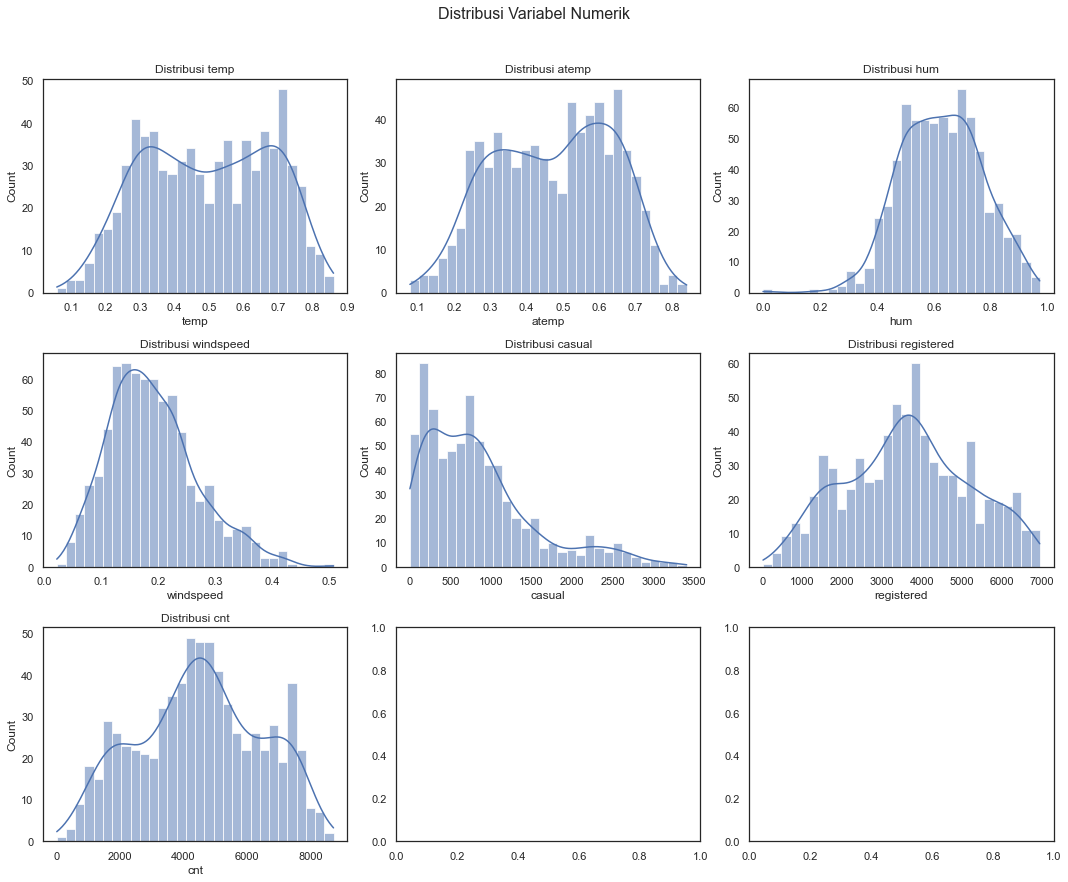

In [15]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribusi Variabel Numerik', y=1.02, fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(df_day[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribusi {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

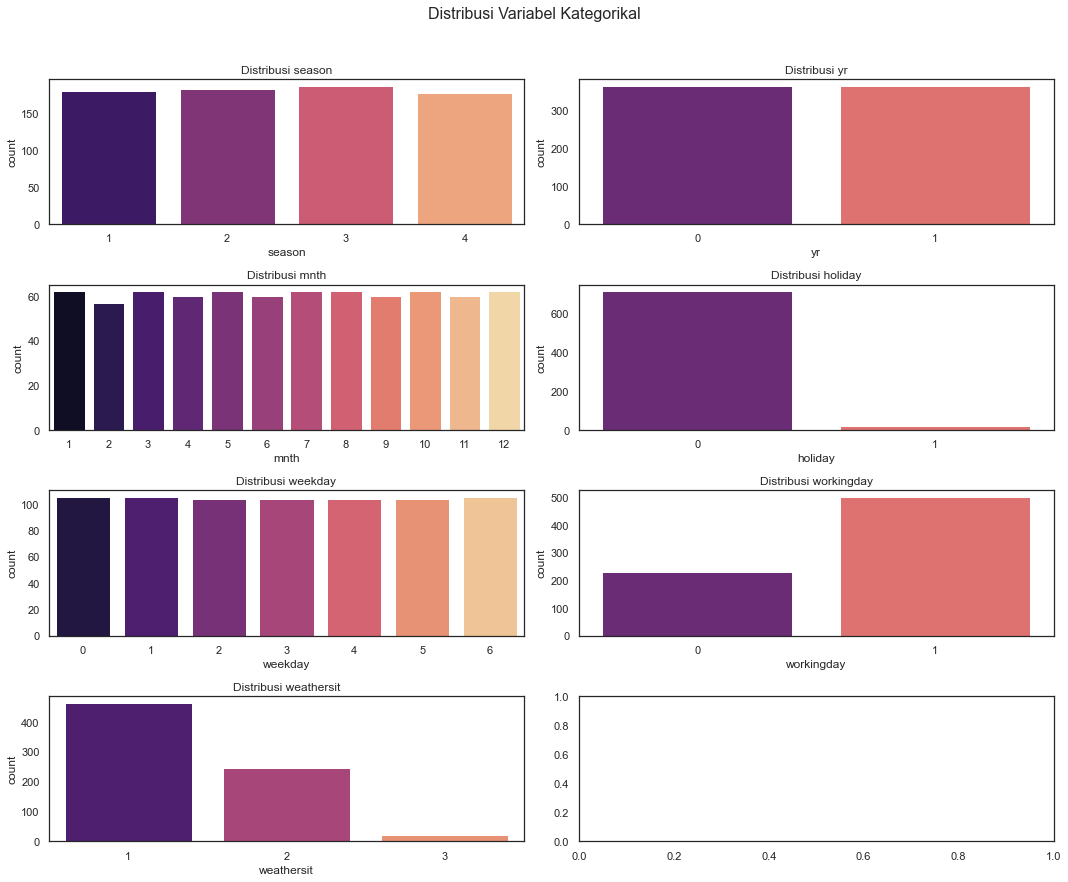

In [16]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
fig.suptitle('Distribusi Variabel Kategorikal', y=1.02, fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical columns and create bar plots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_day, x=col, palette="magma", ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

- specifict
1. Berapakah total untuk sewa sepeda untuk tahun dari 2011 dan 2012 seluruh musim gugur dari musim 3

In [17]:
# Filter tahun 2011 dan musim gugur (season 3)
filtered_data_2011_autumn = df_day[(df_day["yr"] == 0) & (df_day["season"] == 3)]

# Filter tahun 2012 dan musim gugur (season 3)
filtered_data_2012_autumn = df_day[(df_day["yr"] == 1) & (df_day["season"] == 3)]

# Hitung jumlah total sewa sepeda (cnt)
total_sewa_sepeda_2011_autumn = filtered_data_2011_autumn["cnt"].sum()
total_sewa_sepeda_2012_autumn = filtered_data_2012_autumn["cnt"].sum()

print("Jumlah total sewa sepeda untuk tahun 2011 selama musim gugur (musim 3):", total_sewa_sepeda_2011_autumn)
print("\nJumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3):", total_sewa_sepeda_2012_autumn)

Jumlah total sewa sepeda untuk tahun 2011 selama musim gugur (musim 3): 419650

Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3): 641479


- Measurable
2. Berapa banyak sepeda yang disewakan dalam waktu hari libur, (liburan = 1)  selama musim panas pada tahun 2012

In [18]:
# Filter tahun 2012, musim panas (season 3), dan hari libur (holiday = 1)
filtered_data_2012_summer_holiday = df_day[(df_day["yr"] == 1) & (df_day["season"] == 3) & (df_day["holiday"] == 1)]

# Hitung jumlah total sepeda yang disewakan
total_sepeda_disewakan_2012_summer_holiday = filtered_data_2012_summer_holiday["cnt"].sum()

print("Jumlah total sepeda yang disewakan pada hari libur selama musim panas tahun 2012:", total_sepeda_disewakan_2012_summer_holiday)

Jumlah total sepeda yang disewakan pada hari libur selama musim panas tahun 2012: 13437


- Action-Oriented
3.  Bagaimana cara meningkatkan jumlah rental sewa sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)

In [34]:
import plotly.express as px

# Filter pengguna casual (casual) pada hari kerja (workingday = 1)
filtered_data_casual_workingday = df_day[(df_day["workingday"] == 1) & (df_day["casual"] > 0)]

# Visualisasikan jumlah sewa sepeda casual pada hari kerja
fig = px.bar(filtered_data_casual_workingday, x="weekday", y="casual", 
            title="Jumlah Sewa Sepeda Casual pada Hari Kerja",
            labels={"weekday": "Hari Kerja", "casual": "Jumlah Sewa Sepeda Casual"},
            color="weekday", 
            color_discrete_sequence=px.colors.qualitative.Set3)  # Menambahkan warna berbeda untuk setiap hari
fig.show()

1. Penawaran Spesial pada Hari Kerja:
    Tawarkan penawaran khusus atau diskon untuk pengguna casual pada hari kerja. Hal ini dapat meningkatkan minat mereka untuk menyewa sepeda pada hari kerja.

2. Program Keanggotaan:
    Kenalkan program keanggotaan khusus untuk pengguna casual yang aktif pada hari kerja. Program ini dapat mencakup keuntungan tambahan atau diskon khusus.

3. Promosi Acara Khusus:
    Selenggarakan acara-acara khusus atau promosi pada hari kerja yang dapat menarik pengguna casual. Ini bisa berupa event perjalanan bersama, kelas bersepeda, atau promosi khusus lainnya.

4. Perluas Jaringan Sepeda:
    Pastikan ketersediaan sepeda yang cukup pada stasiun-stasiun sepeda di area yang sering digunakan oleh pengguna casual pada hari kerja.

5. Analisis Pemahaman Pelanggan:
    Analisis data pengguna casual pada hari kerja untuk memahami pola dan preferensi mereka. Informasi ini dapat membantu menyesuaikan strategi pemasaran dan promosi.

- Relevant 
4. Apa hubungan suhu (temp) dengan jumlah pengguna yang terdaftar (registered)?

In [35]:
# Scatter plot dengan garis tren
fig = px.scatter(df_day, x="temp", y="registered", trendline="ols",
                title="Hubungan Suhu dengan Jumlah Pengguna Terdaftar",
                labels={"temp": "Suhu", "registered": "Jumlah Pengguna Terdaftar"},
                color="season",  # Menambahkan warna berdasarkan musim untuk lebih kontekstual
                size="cnt",  # Menambahkan ukuran marker berdasarkan jumlah total sewa sepeda
                hover_name="dteday",  # Menambahkan label hover dengan tanggal
                opacity=0.8)  # Menambahkan opacity agar lebih mudah melihat tumpukan marker
fig.update_layout(showlegend=True)
fig.show()

### insight

1. Dari garis tren, Anda dapat melihat apakah ada kecenderungan peningkatan atau penurunan jumlah pengguna terdaftar seiring dengan kenaikan suhu.
2. Warna berdasarkan musim dapat membantu melihat apakah hubungan tersebut konsisten di setiap musim atau mungkin berbeda.
3. Ukuran marker berdasarkan jumlah total sewa sepeda memberikan informasi tentang seberapa besar dampak jumlah sewa sepeda terhadap hubungan suhu dan pengguna terdaftar.

- Relevant 
5. Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur ?

In [36]:
# Filter musim gugur (season 3)
filtered_data_autumn = df_day[df_day["season"] == 3]

# Buat plot untuk menganalisis pengaruh cuaca terhadap jumlah sewa sepeda
fig = px.bar(filtered_data_autumn, x="weathersit", y="cnt", color="weathersit",
            title="Pengaruh Cuaca terhadap Jumlah Sewa Sepeda (Musim Gugur)",
            labels={"weathersit": "Cuaca", "cnt": "Jumlah Sewa Sepeda"},
            category_orders={"weathersit": ["Clear", "Mist", "Light Rain", "Heavy Rain"]},
            opacity=0.8)

# Tampilkan plot dengan menyesuaikan layout
fig.update_layout(xaxis_title="Cuaca", yaxis_title="Jumlah Sewa Sepeda (cnt)", showlegend=True)
fig.show()


weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


Insight:

- Cuaca yang cerah (Clear) cenderung memiliki jumlah sewa sepeda yang lebih tinggi.
- Cuaca kabut (Mist) dan cuaca salju ringan (Light Snow) mungkin memiliki dampak negatif pada jumlah sewa sepeda.
- Pengguna cenderung mengurangi penggunaan sepeda saat cuaca sangat buruk (Heavy Rain).

- time-Bound
6. Berapa distribusi per jam sewa sepeda (cnt) pada Hari libur dan hari kerja pada tahun 2012 (tahun = 1)?

In [37]:
# Filter data tahun 2012 (yr = 1), Hari Libur (holiday = 1), dan Hari Kerja (workingday = 1)
filtered_data_2012_holiday = df_hour[(df_hour["yr"] == 1) & (df_hour["holiday"] == 1)]
filtered_data_2012_workingday = df_hour[(df_hour["yr"] == 1) & (df_hour["workingday"] == 1)]

# Hitung distribusi per jam sewa sepeda (cnt) untuk Hari Libur dan Hari Kerja
distribusi_per_jam_holiday = filtered_data_2012_holiday.groupby("hr")["cnt"].sum()
distribusi_per_jam_workingday = filtered_data_2012_workingday.groupby("hr")["cnt"].sum()

# Visualisasikan distribusi per jam
fig = px.line(x=distribusi_per_jam_holiday.index, y=distribusi_per_jam_holiday.values,
            labels={"x": "Jam", "y": "Jumlah Sewa Sepeda"},
            title="Distribusi Per Jam Sewa Sepeda pada Hari Libur (2012)")
fig.update_xaxes(tickmode="linear")
fig.show()

fig = px.line(x=distribusi_per_jam_workingday.index, y=distribusi_per_jam_workingday.values,
            labels={"x": "Jam", "y": "Jumlah Sewa Sepeda"},
            title="Distribusi Per Jam Sewa Sepeda pada Hari Kerja (2012)")
fig.update_xaxes(tickmode="linear")
fig.show()

insight : 
- Anda dapat melihat tren distribusi per jam sewa sepeda pada Hari Libur dan Hari Kerja pada tahun 2012.
- Mungkin ada perbedaan pola konsumsi sepeda antara Hari Libur dan Hari Kerja yang dapat membantu dalam perencanaan sumber daya

Conclusion :

1. terdapat faktor utama yang signifikan disini yaitu faktor cuaca mempengaruhi jumlah sewa sepeda.

2. perbedaan dalam total jumlah sewa sepeda dari tahun 2011 dan 2012 selama musim gugur (musim 3) yang berjumlah yaitu : 
- tahun 2011 berjumlah 419.650.
- tahun 2012 berjumlah 651.479.

3. pada jumlah sewa sepeda  yang disewakan hari libur selama musim panas tahun 2012 total jumlah 13437, disini terjadi peningkatan yang sangat dratis secara popuralitas dalam bersepeda saat liburan. mengalami jumlah nilai tinggi untuk nilai inventaris secara infrastruktur, minat orang-orang terhadap sepeda untuk hidup sehat saat memiliki waktu yang banyak di hari libur.

4. pada jumlah sewa sepeda casual pada hari kerja, dihari ke-5 yaitu jumat memiliki perbandingan yang mencolok yaitu peningkatan dalam minat sewa sepeda bahwa menunjukan yang signifikan menjelang akhir pekan.

5. hubungan suhu (temp) dan dengan jumlah pengguna yang terdaftar (registered) disini menunjukan bahwa cuaca dapat mempengaruhi minat dalam bersepeda, secara peningkatan suhu cuaca juga meningkatkan jumlah pengguna bersepeda.

6. pada distribusi perjam sewa pada hari libur tahun 2012 memiliki peningkatan signifikan pada pukul 17.00 yang total berjumlah sewa sepeda 3.880 orang, sedangkan pada distribusi perjam sewa pada hari kerja tahun 2012 memiliki peningkatan signifikan pada pukul 17.00 yang total berjumlah sewa sepeda 163.391 orang.